<a href="https://colab.research.google.com/github/Dima200206/-2/blob/main/%D0%9B%D0%911_%D0%92%D0%BB%D0%B0%D1%81%D0%B5%D0%BD%D0%BA%D0%BE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лабораторна робота 5.
Метод ліктя. Кластеризація даних.
#Завдання 1.
Завантажити датасет Ірис. Роздрукувати перші 5 рядочків.
Методом ліктя і методом силуєтів визначити оптимальну кількість кластерів.
Візуалізувати кластери.



   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


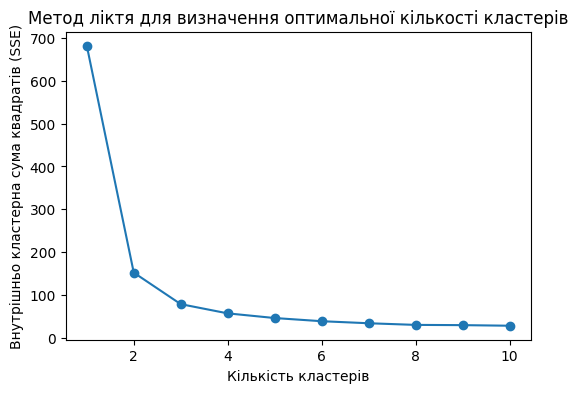

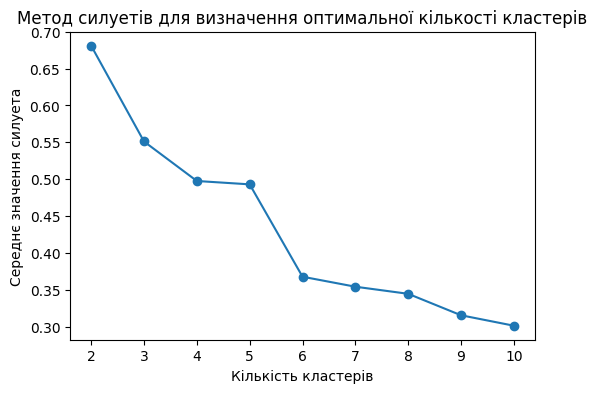

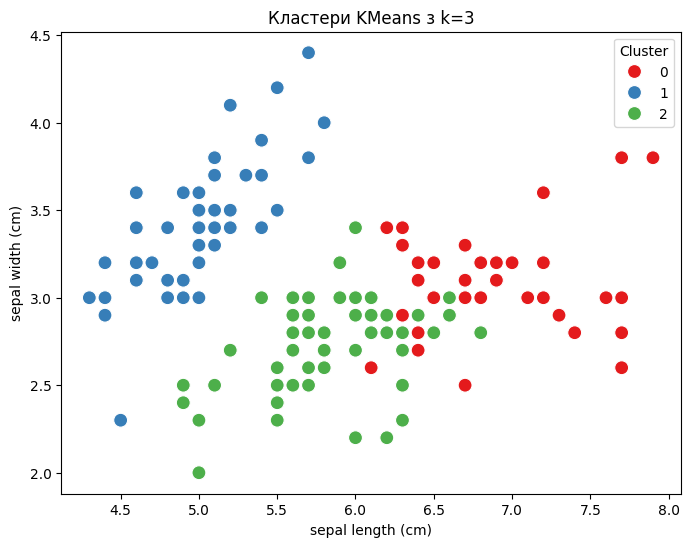

In [1]:
# Імпортуємо необхідні бібліотеки
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Завантажуємо датасет Ірис
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Роздруковуємо перші 5 рядків
print(df.head())

# Метод ліктя для визначення оптимальної кількості кластерів
sse = []
cluster_range = range(1, 11)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

# Візуалізація методу ліктя
plt.figure(figsize=(6, 4))
plt.plot(cluster_range, sse, marker='o')
plt.xlabel('Кількість кластерів')
plt.ylabel('Внутрішньо кластерна сума квадратів (SSE)')
plt.title('Метод ліктя для визначення оптимальної кількості кластерів')
plt.show()

# Метод силуетів для визначення оптимальної кількості кластерів
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df)
    silhouette_scores.append(silhouette_score(df, labels))

# Візуалізація методу силуетів
plt.figure(figsize=(6, 4))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Кількість кластерів')
plt.ylabel('Середнє значення силуета')
plt.title('Метод силуетів для визначення оптимальної кількості кластерів')
plt.show()

# Візуалізація кластерів з оптимальною кількістю
optimal_k = 3  # Наприклад, вибрано 3, але можна замінити на результат з методів вище
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df)

# Використаємо лише перші дві ознаки для візуалізації
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue=df['Cluster'], palette='Set1', s=100)
plt.title(f'Кластери KMeans з k={optimal_k}')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()


#Завдання 2.
Завантажити датасет
Реалізувати попередній аналіз даних:
Роздрукувати перші 5 рядків.
Вивести розмір датасета, типи даних.
Перевірити на пропущені значення. При наявності замінити на середнє за
стовпцем.
Перевірити на дублікати. Якщо є – видалити. Вивести описову статистику.
Визначити, яку задачу розв’язуємо (регресія чи класифікація). Побудувати 3
моделі на вибір для визначення оцінки. Підібрати оптимальні параметри.
Оцінити моделі.
Визначити методом ліктя і силуєтів оптимальну кількість кластерів.
Візуалізувати кластери.

Перші 5 рядків:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

Розмір датасета:
(150, 5)

Типи даних:
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
dtype: object

Перевірка на пропущені значення:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

Перевірка на дублікати:
1

Описова статистика:
       sepal length (cm)  se

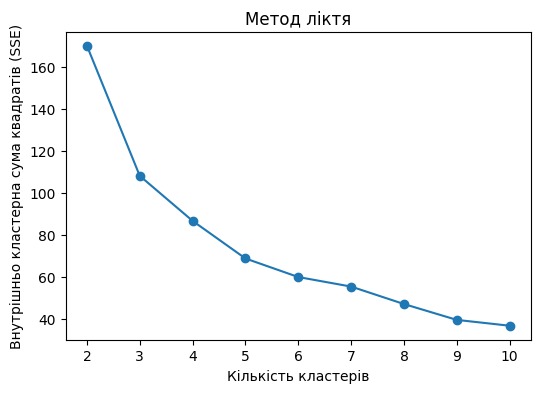

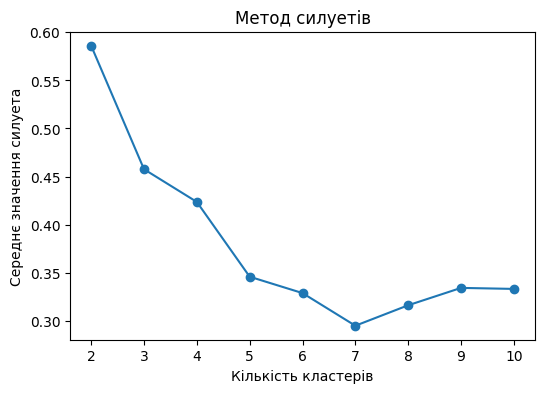

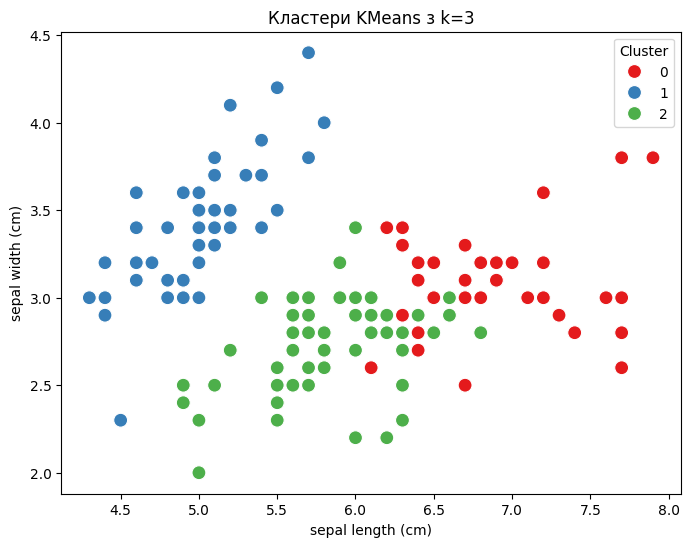

In [2]:
# Імпортуємо необхідні бібліотеки
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score, silhouette_score
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

# Завантажимо датасет (наприклад, використаємо датасет Ірис як приклад)
from sklearn.datasets import load_iris
data = load_iris()

# Створимо DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Попередній аналіз даних
# 1. Роздрукувати перші 5 рядків
print("Перші 5 рядків:")
print(df.head())

# 2. Вивести розмір датасета і типи даних
print("\nРозмір датасета:")
print(df.shape)
print("\nТипи даних:")
print(df.dtypes)

# 3. Перевірка на пропущені значення та заміна на середнє за стовпцем
print("\nПеревірка на пропущені значення:")
print(df.isnull().sum())

# Якщо б були пропущені значення:
# df.fillna(df.mean(), inplace=True)

# 4. Перевірка на дублікати та їх видалення
print("\nПеревірка на дублікати:")
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

# 5. Вивести описову статистику
print("\nОписова статистика:")
print(df.describe())

# Визначення задачі (регресія чи класифікація)
# В даному випадку це класифікація (мітки класів), тому будуємо моделі для класифікації

# 6. Розподіл даних на тренувальний і тестовий набір
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабування ознак
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Побудова 3 моделей для класифікації
# 7. Логістична регресія
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)
print("\nЛогістична регресія - Точність:")
print(accuracy_score(y_test, y_pred_log_reg))

# 8. Лісова модель (Random Forest)
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_scaled, y_train)
y_pred_rf = rf_clf.predict(X_test_scaled)
print("\nЛісова модель - Точність:")
print(accuracy_score(y_test, y_pred_rf))

# 9. Підтримка векторів (SVM)
svm_clf = SVC()
svm_clf.fit(X_train_scaled, y_train)
y_pred_svm = svm_clf.predict(X_test_scaled)
print("\nSVM - Точність:")
print(accuracy_score(y_test, y_pred_svm))

# Оцінка моделей через GridSearch для підбору оптимальних параметрів
# 10. Оптимізація моделі Random Forest
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5)
grid_rf.fit(X_train_scaled, y_train)

print("\nНайкращі параметри для Random Forest:")
print(grid_rf.best_params_)
print("Точність після оптимізації:", accuracy_score(y_test, grid_rf.best_estimator_.predict(X_test_scaled)))

# 11. Метод ліктя і силуетів для визначення оптимальної кількості кластерів
sse = []
silhouette_scores = []
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)
    sse.append(kmeans.inertia_)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X_train_scaled, labels))

# Візуалізація методу ліктя
plt.figure(figsize=(6, 4))
plt.plot(cluster_range, sse, marker='o')
plt.xlabel('Кількість кластерів')
plt.ylabel('Внутрішньо кластерна сума квадратів (SSE)')
plt.title('Метод ліктя')
plt.show()

# Візуалізація методу силуетів
plt.figure(figsize=(6, 4))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Кількість кластерів')
plt.ylabel('Середнє значення силуета')
plt.title('Метод силуетів')
plt.show()

# Візуалізація кластерів з оптимальною кількістю (вибір на основі аналізу ліктя та силуетів)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue=df['Cluster'], palette='Set1', s=100)
plt.title(f'Кластери KMeans з k={optimal_k}')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.show()
